### Ungraded Lab: The Hello World of Deep Learning with Neural Networks

Like every first app, you should start with something super simple that shows the overall scaffolding for how your code works. In the case of creating neural networks, one simple case is where it learns the relationship between two numbers. So, for example, if you were writing code for a function like this, you already know the 'rules':


```
def hw_function(x):
    y = (2 * x) - 1
    return y
```

So how would you train a neural network to do the equivalent task? By using data! By feeding it with a set of x's and y's, it should be able to figure out the relationship between them.

This is obviously a very different paradigm from what you might be used to. So let's step through it piece by piece.


#### Imports

Let's start with the imports. Here, you are importing [TensorFlow](https://www.tensorflow.org/) and calling it `tf` for convention and ease of use.

You then import a library called [`numpy`](https://numpy.org) which helps to represent data as arrays easily and to optimize numerical operations.

The framework you will use to build a neural network as a sequence of layers is called [`keras`](https://keras.io/) so you will import that too.


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__) #This prints the version of TensorFlow that is currently installed.

2.15.0


#### Define and Compile the Neural Network

Next, you will create the simplest possible neural network. It has 1 layer with 1 neuron, and the input shape to it is just 1 value. You will build this model using Keras' [Sequential](https://keras.io/api/models/sequential/) class which allows you to define the network as a sequence of [layers](https://keras.io/api/layers/). You can use a single [Dense](https://keras.io/api/layers/core_layers/dense/) layer to build this simple network as shown below.

In [ ]:
# Build a simple Sequential model
"""
The Sequential class is used to stack layers sequentially.

Dense: This is a fully connected layer.
units=1: This specifies that the layer has one neuron.
input_shape=[1]: This defines the shape of the input data. In this case, it expects a single input feature.
"""
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Now, you will compile the neural network. When you do so, you have to specify 2 functions: a [loss](https://keras.io/api/losses/) and an [optimizer](https://keras.io/api/optimizers/).

If you've seen lots of math for machine learning, here's where it's usually used. But in this case, it's nicely encapsulated in functions and classes for you. But what happens here? Let's explain...

You know that in the function declared at the start of this notebook, the relationship between the numbers is `y=2x-1`. When the computer is trying to 'learn' that, it makes a guess... maybe `y=10x+10`. The `loss` function measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses the `optimizer` function to make another guess. Based on how the loss function went, it will try to minimize the loss. At that point maybe it will come up with something like `y=5x+5`, which, while still pretty bad, is closer to the correct result (i.e. the loss is lower).

It will repeat this for the number of _epochs_ which you will see shortly. But first, here's how you will tell it to use [mean squared error](https://keras.io/api/losses/regression_losses/#meansquarederror-function) for the loss and [stochastic gradient descent](https://keras.io/api/optimizers/sgd/) for the optimizer. You don't need to understand the math for these yet, but you can see that they work!

Over time, you will learn the different and appropriate loss and optimizer functions for different scenarios.


In [ ]:
# Compile the model
# The model.compile() method configures the model for training.
model.compile(optimizer='sgd', loss='mean_squared_error')

#### Providing the Data

Next up, you will feed in some data. In this case, you are taking 6 X's and 6 Y's. You can see that the relationship between these is `y=2x-1`, so where `x = -1`, `y=-3` etc.

The de facto standard way of declaring model inputs and outputs is to use `numpy`, a Python library that provides lots of array type data structures. You can specify these values by building numpy arrays with [`np.array()`](https://numpy.org/doc/stable/reference/generated/numpy.array.html).

In [ ]:
# Declare model inputs and outputs for training
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

#### Training the Neural Network

The process of training the neural network, where it 'learns' the relationship between the x's and y's is in the [`model.fit()`](https://keras.io/api/models/model_training_apis/#fit-method)  call. This is where it will go through the loop we spoke about above: making a guess, measuring how good or bad it is (aka the loss), using the optimizer to make another guess etc. It will do it for the number of `epochs` you specify. When you run this code, you'll see the loss on the right hand side.

In [ ]:
# Train the model
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 446ms/step - loss: 2.5554
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 2.1613
Epoch 3/500
1/1 [==============================] - 0s 14ms/step - loss: 1.8481
Epoch 4/500
1/1 [==============================] - 0s 14ms/step - loss: 1.5987
Epoch 5/500
1/1 [==============================] - 0s 13ms/step - loss: 1.3995
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 1.2399
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 1.1115
Epoch 8/500
1/1 [==============================] - 0s 13ms/step - loss: 1.0076
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 0.9232
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 0.8541
Epoch 11/500
1/1 [==============================] - 0s 13ms/step - loss: 0.7971
Epoch 12/500
1/1 [==============================] - 0s 18ms/step - loss: 0.7497
Epoch 13/500
1/1 [==============================

Ok, now you have a model that has been trained to learn the relationship between `x` and `y`. You can use the [`model.predict()`](https://keras.io/api/models/model_training_apis/#predict-method) method to have it figure out the `y` for a previously unknown `x`. So, for example, if `x=10`, what do you think `y` will be? Take a guess before you run this code:

In [ ]:
# Make a prediction
print(model.predict([10.0]))

1/1 [==============================] - 0s 105ms/step
[[18.985447]]


You might have thought `19`, right? But it ended up being a little under. Why do you think that is?

Remember that neural networks deal with probabilities. So given the data that we fed the model with, it calculated that there is a very high probability that the relationship between `x` and `y` is `y=2x-1`, but with only 6 data points we can't know for sure. As a result, the result for 10 is very close to 19, but not necessarily 19.

As you work with neural networks, you'll see this pattern recurring. You will almost always deal with probabilities, not certainties, and will do a little bit of coding to figure out what the result is based on the probabilities, particularly when it comes to classification.


# Ungraded Lab: Beyond Hello World, A Computer Vision Example
In the previous exercise, you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function `y=2x-1` directly instead of bothering with using machine learning to learn the relationship between `x` and `y`.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where you will build a neural network to recognize different items of clothing, trained from a dataset containing 10 different types.

### Start Coding

Let's start with our import of TensorFlow.

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.15.0


The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

Calling `load_data()` on this object will give you two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.


In [ ]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


What do these values look like? Let's print a training image (both as an image and a numpy array), and a training label to see. Experiment with different indices in the array. For example, also take a look at index `42`. That's a different boot than the one at index `0`.


LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

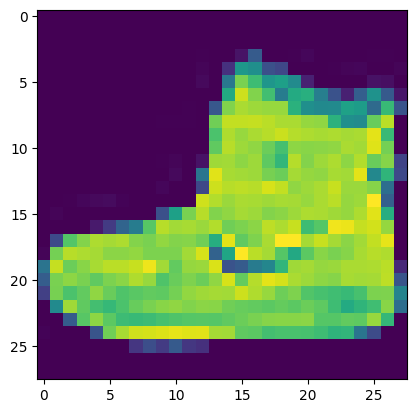

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=200) #linewidth is set to 320. This allows NumPy to print more elements per line, potentially showing the entire image array on a single line for better readability.

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called _normalization_ and fortunately in Python, it's easy to normalize an array without looping. You do it like this:

In [ ]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

Let's now design the model. There's quite a few new concepts here. But don't worry, you'll get the hang of them.

In [ ]:
"""
Flatten: Images are typically represented as 3D tensors with height, width, and color channels. Flattening reshapes the input into a 1D vector,
making it suitable for feeding into the fully connected layers that follow.
"""
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now:

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```
if x > 0:
  return x

else:
  return 0
```

In other words, it only passes values greater than 0 to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.


In [ ]:
'''
inputs = np.array([[1.0, 3.0, 4.0, 2.0]]), the specific values 1.0, 3.0, 4.0, 2.0 are arbitrary and represent a sample input to your model. They don't hold any inherent
meaning in this context.
'''
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

input to softmax function: [[1. 3. 4. 2.]]


In [ ]:
# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


The next thing to do, now that the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling `model.fit()` asking it to fit your training data to your training labels. It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks like the training data, then it can predict what the label for that input is.

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5006 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3790 - accuracy: 0.8629
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3399 - accuracy: 0.8757
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3137 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2949 - accuracy: 0.8913


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like `0.9098`. This tells you that your neural network is about 91% accurate in classifying the training data. That is, it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images and labels. We can call [`model.evaluate()`](https://keras.io/api/models/model_training_apis/#evaluate-method) with this test dataset as inputs and it will report back the loss and accuracy of the model. Let's give it a try:

In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3486 - accuracy: 0.8750


[0.34857097268104553, 0.875]

You can expect the accuracy here to be about `0.88` which means it was 88% accurate on the entire test set. As expected, it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this.

### Exploration Exercises

To explore further and deepen your understanding, try the below exercises:

### Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [ ]:
classifications = model.predict(test_images)

print(classifications[1])
#print(test_labels[0])

313/313 [==============================] - 3s 9ms/step
[4.2459553e-05 4.5671111e-09 9.9472374e-01 1.6170681e-07 3.1850529e-03 1.6402860e-10 2.0484731e-03 5.4733263e-16 1.3815065e-07 6.3528310e-15]


**Hint:** try running `print(test_labels[0])` -- and you'll get a `9`. Does that help you understand why this list looks the way it does?

### E1Q1: What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


<details><summary>Click for Answer</summary>
<p>

#### Answer:
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.

</p>
</details>

### E1Q2: How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


<details><summary>Click for Answer</summary>
<p>

#### Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

</p>
</details>

### Exercise 2:
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?


In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4748
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3579
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3216
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2976
Epoch 5/5
313/313 [==============================] - 2s 6ms/step
[8.5624329e-08 1.7623670e-08 2.0630111e-08 4.3197156e-12 2.2202812e-08 1.6209210e-03 9.5383378e-08 6.3261035e-04 6.3555397e-08 9.9774611e-01]
9


### E2Q1: Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


<details><summary>Click for Answer</summary>
<p>

#### Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

</p>
</details>

### Exercise 3:

### E3Q1: What would happen if you remove the Flatten() layer. Why do you think that's the case?

<details><summary>Click for Answer</summary>
<p>

#### Answer
You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writing all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

</p>
</details>

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), #Try removing this layer
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5122
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3868
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3519
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3280
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[7.8922958e-06 8.1968722e-08 8.8379358e-07 4.5996847e-05 5.6639037e-06 2.8616898e-02 4.5197186e-05 7.0171729e-02 7.0797047e-04 9.0039772e-01]
9


### Exercise 4:

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.

<details><summary>Click for Answer</summary>
<p>

#### Answer
You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

</p>
</details>

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.5184
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3931
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3547
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3291
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[5.2595806e-06 1.0429150e-08 2.3519765e-06 1.3931532e-06 1.5088882e-06 6.2310006e-03 1.3710528e-05 2.2036875e-02 2.6383024e-04 9.7144407e-01]
9


### Exercise 5:

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

<details><summary>Click for Answer</summary>
<p>

#### Answer
There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

</p>
</details>

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    #tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu)
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 2.3082
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 2.3026
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 2.3026
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 2.3026
Epoch 5/5
313/313 [==============================] - 2s 7ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
9


### Exercise 6:

### E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case?

- Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
- Try 30 epochs -- you might see the loss value decrease more slowly, and sometimes increases. You'll also likely see that the results of `model.evaluate()` didn't improve much. It can even be slightly worse.

This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=15) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)


### Exercise 7:

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

#training_images=training_images/255.0 # Experiment with removing this line
#test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 3.8637
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5195
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5097
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5040
Epoch 5/5
313/313 [==============================] - 1s 4ms/step
[7.0863440e-14 8.9114801e-16 4.4299653e-25 1.6622937e-16 1.3421110e-23 9.7888121e-03 2.5046140e-21 5.7495676e-02 6.6763782e-08 9.3271530e-01]
9


### Exercise 8:

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 60% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Epoch 1/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.4759 - accuracy: 0.8298
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4758 - accuracy: 0.8299


# Ungraded Lab: Using Callbacks to Control Training

In this lab, you will use the [Callbacks API](https://keras.io/api/callbacks/) to stop training when a specified metric is met. This is a useful feature so you won't need to complete all epochs when this threshold is reached. For example, if you set 1000 epochs and your desired accuracy is already reached at epoch 200, then the training will automatically stop. Let's see how this is implemented in the next sections.


### Load and Normalize the Fashion MNIST dataset

Like the previous lab, you will use the Fashion MNIST dataset again for this exercise. And also as mentioned before, you will normalize the pixel values to help optimize the training.

In [ ]:
import tensorflow as tf

# Instantiate the dataset API
fmnist = tf.keras.datasets.fashion_mnist

# Load the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

## Creating a Callback class

You can create a callback by defining a class that inherits the [tf.keras.callbacks.Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback) base class. From there, you can define available methods to set where the callback will be executed. For instance below, you will use the [on_epoch_end()](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback#on_epoch_end) method to check the loss at each training epoch.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the loss falls below 0.4

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
      self: This refers to the current instance of the myCallback class.
      epoch (integer): This argument represents the current epoch number (potentially unused in this specific implementation).
      logs (dict): This is a dictionary containing various metrics (loss, accuracy, etc.) calculated during the training epoch.
    '''

    # Check the loss
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

### Define and compile the model

Next, you will define and compile the model. The architecture will be similar to the one you built in the previous lab. Afterwards, you will set the optimizer, loss, and metrics that you will use for training.

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



### Train the model

Now you are ready to train the model. To set the callback, simply set the `callbacks` parameter to the `myCallback` instance you declared before. Run the cell below and observe what happens.

In [ ]:
# Train the model with a callback
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4774 - accuracy: 0.8311
Epoch 2/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.3600 - accuracy: 0.8688
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3600 - accuracy: 0.8687


# Ungraded Lab: Improving Computer Vision Accuracy using Convolutions

## Shallow Neural Network

In the previous lessons, you saw how to do fashion recognition using a neural network containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and only one hidden layer. You experimented with the impact of different sizes of hidden layer, number of training epochs etc on the final accuracy. For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end.

In [ ]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:


# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4965 - accuracy: 0.8273
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3779 - accuracy: 0.8659
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3372 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3130 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2948 - accuracy: 0.8917

MODEL EVALUATION:
313/313 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8757


## Convolutional Neural Network

In the model above, your accuracy will probably be about 89% on training and 87% on validation. Not bad. But how do you make that even better? One way is to use something called _convolutions_. We're not going into the details of convolutions in this notebook (please see resources in the classroom), but the ultimate concept is that they narrow down the content of the image to focus on specific parts and this will likely improve the model accuracy.

If you've ever done image processing using a filter (like [this](https://en.wikipedia.org/wiki/Kernel_(image_processing))), then convolutions will look very familiar. In short, you take an array (usually 3x3 or 5x5) and scan it over the entire image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 matrix that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

**This is perfect for computer vision because it often highlights features that distinguish one item from another. Moreover, the amount of information needed is then much less because you'll just train on the highlighted features.**

That's the concept of **Convolutional Neural Networks**. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focused and possibly more accurate.

Run the code below. This is the same neural network as earlier, but this time with [Convolution](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers added first. It will take longer, but look at the impact on the accuracy.

In [ ]:
# Define the model
model = tf.keras.models.Sequential([

  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

It's likely gone up to about 92% on the training data and 90% on the validation data. That's significant, and a step in the right direction!

Look at the code again, and see, step by step how the convolutions were built. Instead of the input layer at the top, you added a [Conv2D layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D). The parameters are:

1. The number of convolutions you want to generate. The value here is purely arbitrary but it's good to use powers of 2 starting from 32.
2. The size of the Convolution. In this case, a 3x3 grid.
3. The activation function to use. In this case, you used a ReLU, which you might recall is the equivalent of returning `x` when `x>0`, else return `0`.
4. In the first layer, the shape of the input data.

You'll follow the convolution with a [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layer which is designed to compress the image, while maintaining the content of the features that were highlighted by the convolution. By specifying `(2,2)` for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one. Thus, it turns 4 pixels into 1. It repeats this across the image, and in doing so, it halves both the number of horizontal and vertical pixels, effectively reducing the image to 25% of the original image.

You can call `model.summary()` to see the size and shape of the network, and you'll notice that after every max pooling layer, the image size is reduced in this way.


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```


Then you added another convolution and flattened the output.



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
  tf.keras.layers.Flatten(),
  
```


After this, you'll just have the same DNN structure as the non convolutional version. The same dense layer with 128 neurons, and output layer with 10 neurons as in the pre-convolution example:



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


## About overfitting

Try running the training for more epochs -- say about 20, and explore the results. But while the results might seem really good, the validation results may actually go down, due to something called _overfitting_. In a nutshell, overfitting occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at interpreting other unseen data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it. But blue suede shoes might confuse you... and you know you should never mess with my blue suede shoes.

## Visualizing the Convolutions and Pooling

Let's explore how to show the convolutions graphically. The cell below prints the first 100 labels in the test set, and you can see that the ones at index `0`, index `23` and index `28` are all the same value (i.e. `9`). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the dense layer is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 25ms/step


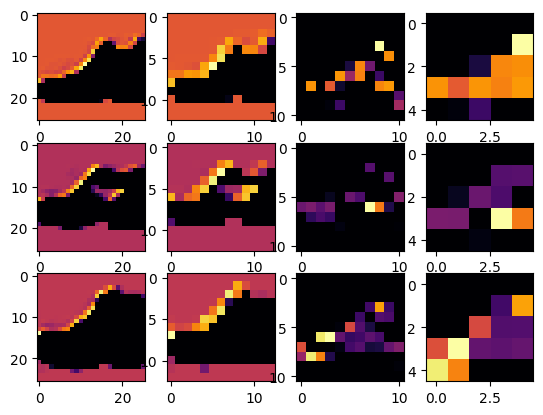

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]  #layer_outputs collects the output of each layer in the model.
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs) #activation_model creates a new model that outputs the activations of all layers given an input.

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

### EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here.

# Ungraded Lab: Exploring Convolutions

In this lab, you will explore how convolutions work by creating a basic convolution on a 2D grayscale image. First, you will load the image by taking the [ascent](https://docs.scipy.org/doc/scipy/reference/generated/scipy.datasets.ascent.html) image from [SciPy](https://scipy.org/). It's a nice, built-in picture with lots of angles and lines.

In [ ]:
from scipy.datasets import ascent

# load the ascent image
ascent_image = ascent()

You can use the pyplot library to draw the image so you'll know what it looks like.

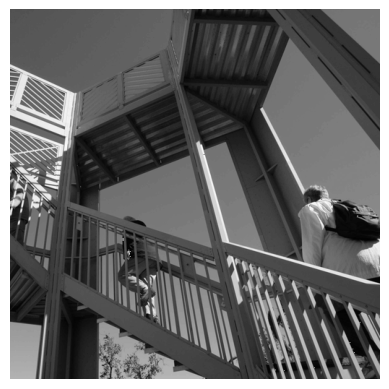

In [ ]:
import matplotlib.pyplot as plt

# Visualize the image
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

The image is stored as a numpy array so you can create the transformed image by first copying that array. You can also get the dimensions of the image so you can loop over it later.

In [ ]:
import numpy as np

# Copy image to a numpy array
image_transformed = np.copy(ascent_image)

# Get the dimensions of the image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

Now you can create a filter as a 3x3 array.

In [ ]:
# Experiment with different values and see the effect
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now you can create a convolution. You will iterate over the image, leaving a 1 pixel margin, and multiplying each of the neighbors of the current pixel by the value defined in the filter (i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter, etc.)

You'll then multiply the result by the weight, and then ensure the result is in the range 0-255.

Finally you'll load the new value into the transformed image.

In [ ]:
# Iterate over the image
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
      convolution = convolution + (ascent_image[x-1, y] * filter[0][1])
      convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])
      convolution = convolution + (ascent_image[x, y-1] * filter[1][0])
      convolution = convolution + (ascent_image[x, y] * filter[1][1])
      convolution = convolution + (ascent_image[x, y+1] * filter[1][2])
      convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])
      convolution = convolution + (ascent_image[x+1, y] * filter[2][1])
      convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])

      # Multiply by weight
      convolution = convolution * weight

      # Check the boundaries of the pixel values
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255

      # Load into the transformed image
      image_transformed[x, y] = convolution

After the loop, you can now plot the image to see the effect of the convolution!

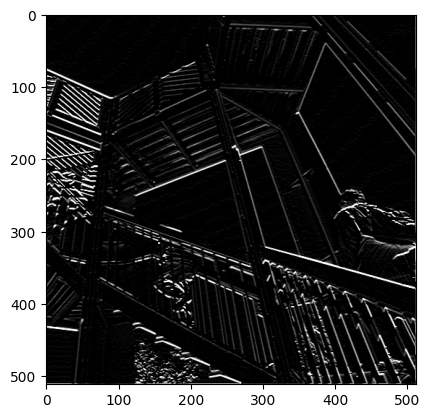

In [ ]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()

## Effect of Max Pooling

The next cell will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. It will take the largest of them and load it into the new image. Thus, the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

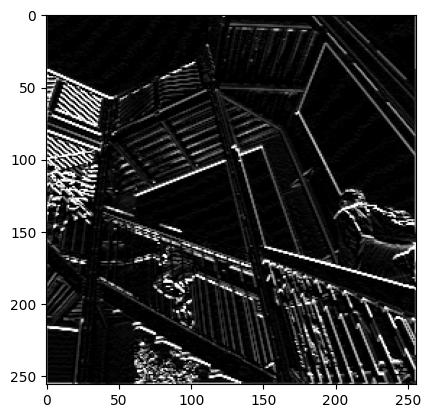

In [ ]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):

    # Store all the pixel values in the (2,2) pool
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    # Get only the largest value and assign to the reduced image
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()

# Ungraded Lab: Training with ImageDataGenerator

In this lab, you will build a train a model on the [Horses or Humans](https://www.tensorflow.org/datasets/catalog/horses_or_humans) dataset. This contains over a thousand images of horses and humans with varying poses and filesizes. You will use the [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class to prepare this dataset so it can be fed to a convolutional neural network.

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Running it on your local machine might result in some of the code blocks throwing errors.

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-07-05 14:05:05--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.206.207, 209.85.145.207, 108.177.121.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.206.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M   109MB/s    in 1.3s    

2024-07-05 14:05:06 (109 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]



You can then unzip the archive using the [zipfile](https://docs.python.org/3/library/zipfile.html) module.

In [ ]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

The contents of the .zip are extracted to the base directory `./horse-or-human`, which in turn each contain `horses` and `humans` subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like' and 'this is what a human looks like'.

One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. You will use the ImageDataGenerator API instead -- and this is coded to automatically label images according to the directory names and structure. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. `ImageDataGenerator` will label the images appropriately for you, reducing a coding step.

You can now define each of these directories:

In [ ]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

Now see what the filenames look like in the `horses` and `humans` training directories:

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse22-2.png', 'horse05-7.png', 'horse01-8.png', 'horse42-8.png', 'horse44-9.png', 'horse25-3.png', 'horse32-3.png', 'horse25-4.png', 'horse40-3.png', 'horse20-4.png']
['human07-17.png', 'human17-16.png', 'human16-00.png', 'human02-15.png', 'human16-20.png', 'human14-23.png', 'human17-25.png', 'human02-09.png', 'human09-28.png', 'human04-16.png']


You can also find out the total number of horse and human images in the directories:

In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


Now take a look at a few pictures to get a better sense of what they look like. First, configure the `matplotlib` parameters:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

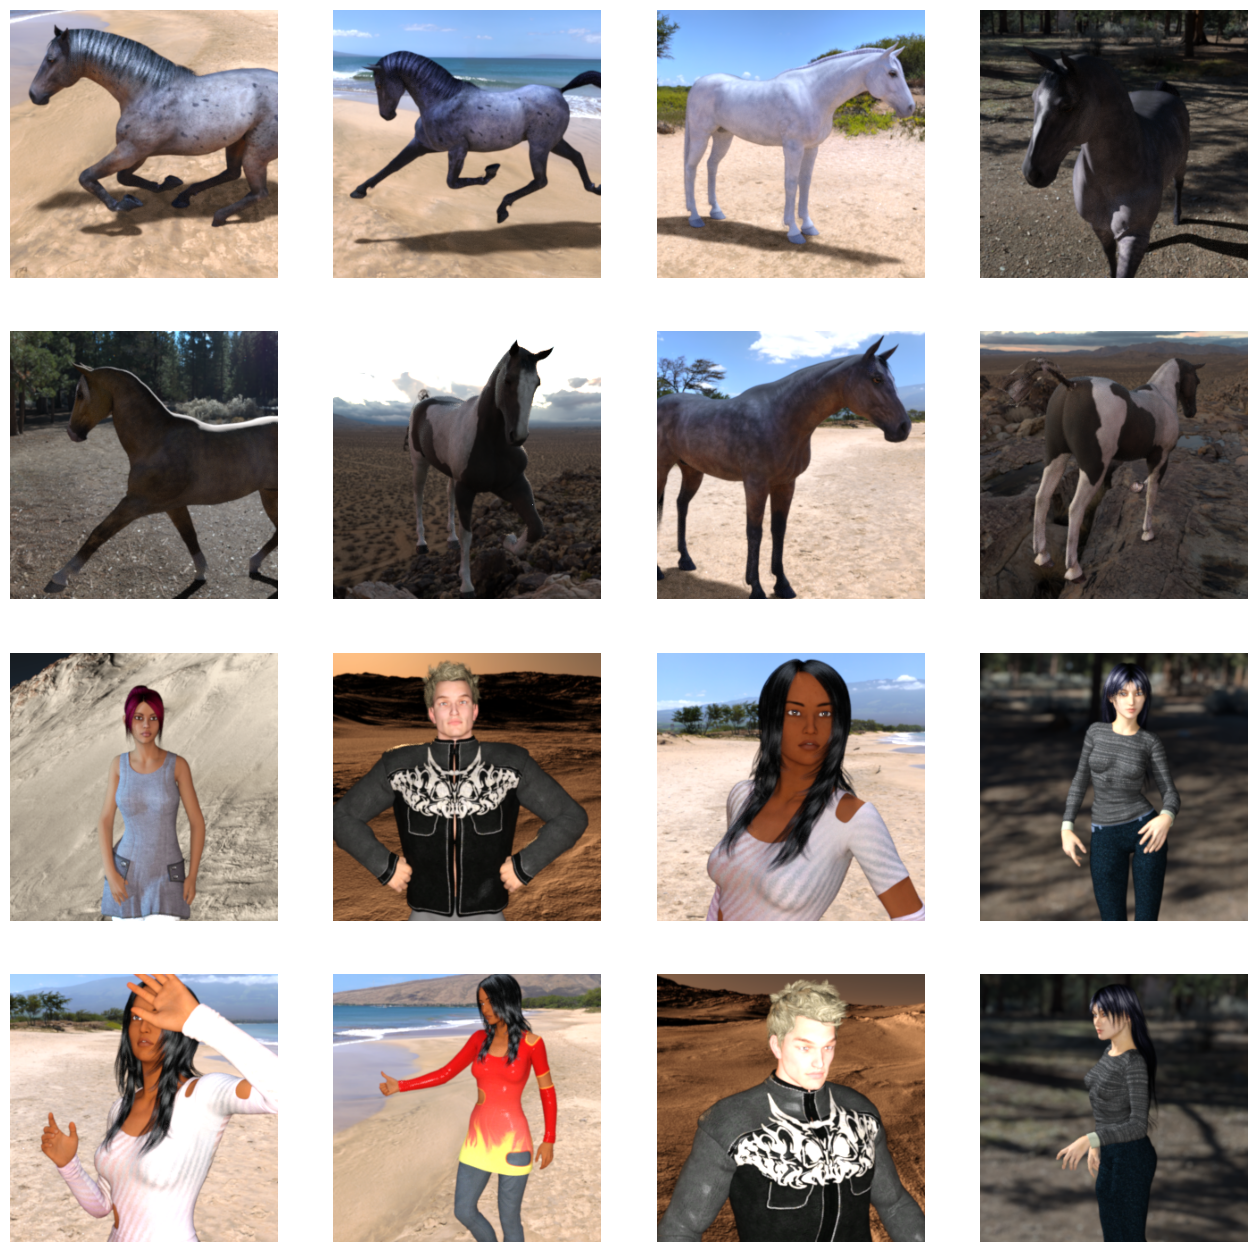

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf() #Get the current figure
fig.set_size_inches(ncols * 4, nrows * 4) #Set the size of the figure. The size is based on the number of columns (ncols) and rows (nrows), each image being 4 inches.

pic_index += 8 #Increment the pic_index to get the next set of images.

next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


### Building a Small Model from Scratch

Now you can define the model architecture that you will train.

Step 1 will be to import tensorflow.

In [ ]:
import tensorflow as tf

You then add convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers. Note that because this is a two-class classification problem, i.e. a *binary classification problem*, you will end your network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function). This makes the output value of your network a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

You can review the network architecture and the output shapes with `model.summary()`.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

The "output shape" column shows how the size of your feature map evolves in each successive layer. As you saw in an earlier lesson, the convolution layers removes the outermost pixels of the image, and each pooling layer halves the dimensions.

Next, you'll configure the specifications for model training. You will train the model with the [`binary_crossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) loss because it's a binary classification problem, and the final activation is a sigmoid. (For a refresher on loss metrics, see this [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) You will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, you will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### Data Preprocessing

Next step is to set up the data generators that will read pictures in the source folders, convert them to `float32` tensors, and feed them (with their labels) to the model. You'll have one generator for the training images and one for the validation images. These generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network (i.e. It is uncommon to feed raw pixels into a ConvNet.) In this case, you will preprocess the images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras, this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.


### Training

You can start training for 15 epochs -- this may take a few minutes to run.

Do note the values per epoch.

The `loss` and `accuracy` are great indicators of progress in training. `loss` measures the current model prediction against the known labels, calculating the result. `accuracy`, on the other hand, is the portion of correct guesses.

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 96s 11s/step - loss: 0.7119 - accuracy: 0.4627
Epoch 2/15
8/8 [==============================] - 96s 11s/step - loss: 0.8071 - accuracy: 0.6507
Epoch 3/15
8/8 [==============================] - 94s 11s/step - loss: 0.6306 - accuracy: 0.6596
Epoch 4/15
8/8 [==============================] - 93s 11s/step - loss: 0.5891 - accuracy: 0.6841
Epoch 5/15
8/8 [==============================] - 94s 11s/step - loss: 0.6156 - accuracy: 0.6151
Epoch 6/15
8/8 [==============================] - 101s 12s/step - loss: 0.5092 - accuracy: 0.8220
Epoch 7/15
8/8 [==============================] - 92s 11s/step - loss: 0.3285 - accuracy: 0.8710
Epoch 8/15
8/8 [==============================] - 92s 11s/step - loss: 0.3000 - accuracy: 0.8988
Epoch 9/15
8/8 [==============================] - 93s 11s/step - loss: 0.1383 - accuracy: 0.9499
Epoch 10/15
8/8 [==============================] - 101s 12s/step - loss: 0.3510 - accuracy: 0.8887
Epoch 11/15
8/8 [==========

### Model Prediction

Now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

_**Note:** Old versions of the Safari browser might have compatibility issues with the code block below. If you get an error after you select the images(s) to upload, you can consider updating your browser to the latest version. If not possible, please comment out or skip the code block below, uncomment the next code block and run it._

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving 98887954_1283945781798640_8455508755654639616_o.jpg to 98887954_1283945781798640_8455508755654639616_o.jpg
Saving IMG_20200113_210408.jpg to IMG_20200113_210408.jpg
Saving IMG_20200121_221733.jpg to IMG_20200121_221733.jpg
1/1 [==============================] - 0s 51ms/step
[0.99998736]
98887954_1283945781798640_8455508755654639616_o.jpg is a human
1/1 [==============================] - 0s 47ms/step
[0.00530552]
IMG_20200113_210408.jpg is a horse
1/1 [==============================] - 0s 47ms/step
[1.238704e-11]
IMG_20200121_221733.jpg is a horse


If you're using Safari and the cell above throws an error, you will need to upload the images(s) manually in their workspace.

Instructions on how to upload image(s) manually in a Colab:

1. Select the `folder` icon on the left `menu bar`.
2. Click on the `folder with an arrow pointing upwards` named `..`
3. Click on the `folder` named `tmp`.
4. Inside of the `tmp` folder, `create a new folder` called `images`. You'll see the `New folder` option by clicking the `3 vertical dots` menu button next to the `tmp` folder.
5. Inside of the new `images` folder, upload an image(s) of your choice, preferably of either a horse or a human. Drag and drop the images(s) on top of the `images` folder.
6. Uncomment and run the code block below.

In [ ]:
# # CODE BLOCK FOR OLD VERSIONS OF SAFARI

# import numpy as np
# from tensorflow.keras.utils import load_img, img_to_array
# import os

# images = os.listdir("/tmp/images")

# print(images)

# for i in images:
#  print()
#  # predicting images
#  path = '/tmp/images/' + i
#  img = load_img(path, target_size=(300, 300))
#  x = img_to_array(img)
#  x /= 255
#  x = np.expand_dims(x, axis=0)

#  images = np.vstack([x])
#  classes = model.predict(images, batch_size=10)
#  print(classes[0])
#  if classes[0]>0.5:
#    print(i + " is a human")
#  else:
#    print(i + " is a horse")

### Visualizing Intermediate Representations

To get a feel for what kind of features your CNN has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the model.

You can pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

1/1 [==============================] - 0s 153ms/step


<ipython-input-25-3501e75cf878>:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-25-3501e75cf878>:48: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


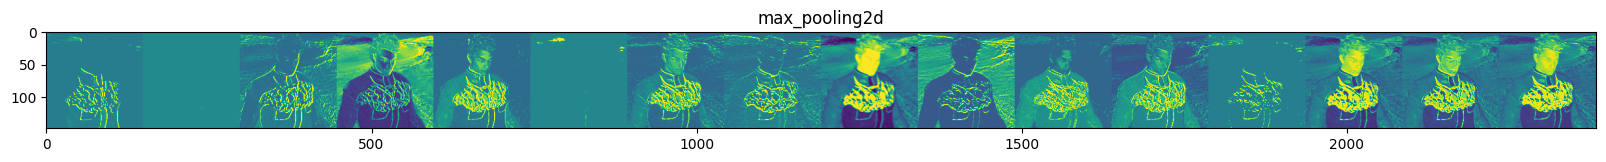

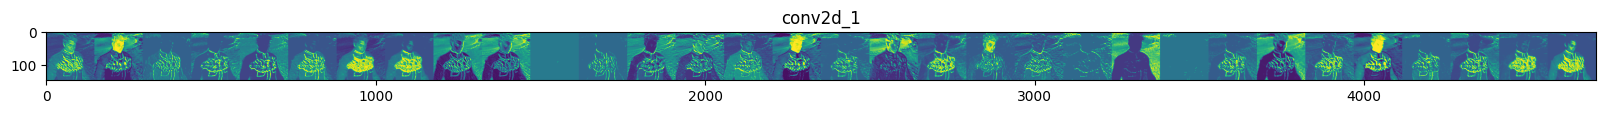

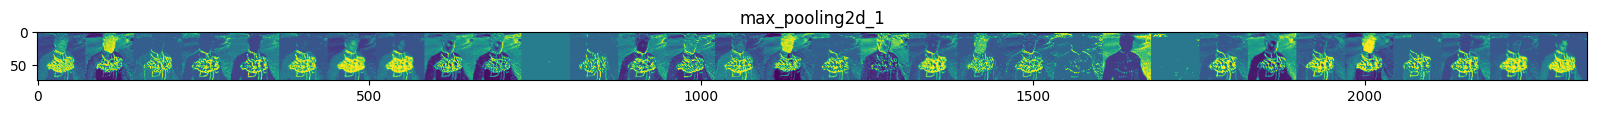

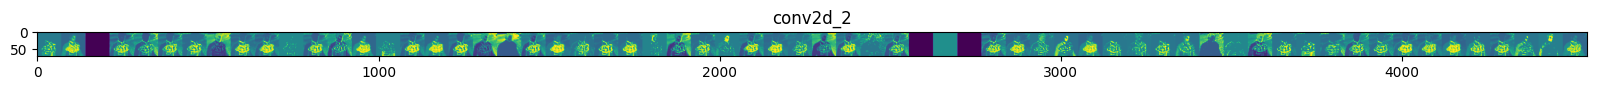

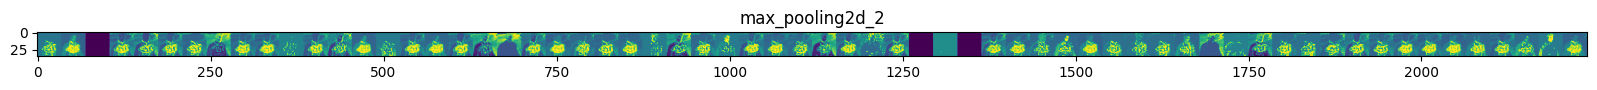

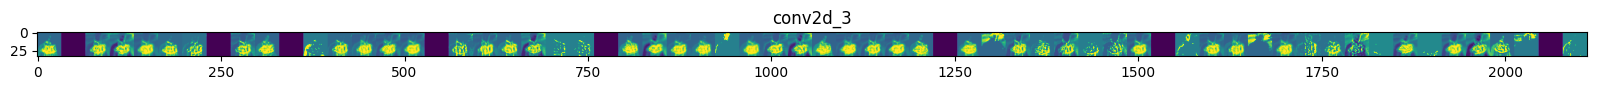

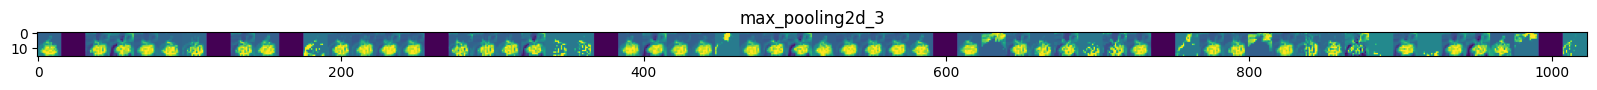

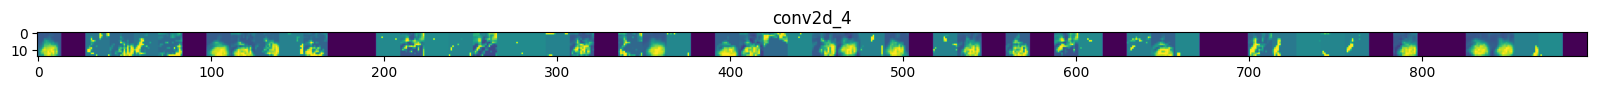

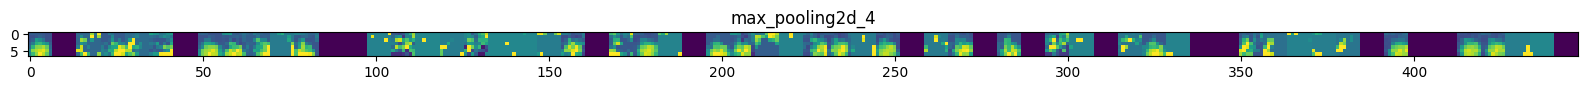

In [ ]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

You can see above how the pixels highlighted turn to increasingly abstract and compact representations, especially at the bottom grid.

The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called _representation sparsity_ and is a key feature of deep learning. These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline wherein each layer filters out the most useful features.

## Clean Up

You will continue with a similar exercise in the next lab but before that, run the following cell to terminate the kernel and free memory resources:

In [ ]:
#from google.colab import runtime
#runtime.unassign()

# Ungraded Lab: Effect of Compacted Images in Training

In this notebook, you will see how reducing the target size of the generator images will affect the architecture and performance of your model. This is a useful technique in case you need to speed up your training or save compute resources. Let's begin!

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Running it on your local machine might result in some of the code blocks throwing errors.

As before, start downloading the train and validation sets:

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-07-05 15:31:55--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  41.3MB/s    in 4.1s    

2024-07-05 15:31:59 (35.2 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-07-05 15:32:01--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  11.4MB/s    in 1.0s    

2024-07-05 15:32:02 (11.4 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



Then unzip them:

In [ ]:
import zipfile

# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

You can check that the directories are not empty and that the train set has more images than the validation set:

In [ ]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [ ]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


## Build the Model

The model will follow the same architecture as before but they key difference is in the `input_shape` parameter of the first `Conv2D` layer. Since you will be compacting the images later in the generator, you need to specify the expected image size here. So instead of 300x300 as in the previous two labs, you specify a smaller 150x150 array.

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution (You can uncomment the 4th and 5th conv layers later to see the effect)
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fifth convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

You can see the difference from previous models when you print the `model.summary()`. As expected, there will be less inputs to the `Dense` layer at the end of the model compared to the previous labs. This is because you used the same number of max pooling layers in your model. And since you have a smaller image to begin with (150 x 150), then the output after all the pooling layers will also be smaller.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

You will use the same settings for training:

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### Data Preprocessing

Now you will instantiate the data generators. As mentioned before, you will be compacting the image by specifying the `target_size` parameter. See the simple change below:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since you used binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since you used binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Training

Now you're ready to train and see the results. Note your observations about how fast the model trains and the accuracies you're getting in the train and validation sets.

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 13s 981ms/step - loss: 1.9297 - accuracy: 0.5918 - val_loss: 0.6853 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 7s 1s/step - loss: 0.6035 - accuracy: 0.6585 - val_loss: 0.3561 - val_accuracy: 0.9062
Epoch 3/15
8/8 [==============================] - 7s 826ms/step - loss: 0.4849 - accuracy: 0.7675 - val_loss: 2.0687 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 7s 876ms/step - loss: 0.4466 - accuracy: 0.8109 - val_loss: 0.6529 - val_accuracy: 0.7852
Epoch 5/15
8/8 [==============================] - 7s 907ms/step - loss: 0.1955 - accuracy: 0.9232 - val_loss: 1.1081 - val_accuracy: 0.7734
Epoch 6/15
8/8 [==============================] - 7s 806ms/step - loss: 0.2740 - accuracy: 0.8832 - val_loss: 0.7138 - val_accuracy: 0.7383
Epoch 7/15
8/8 [==============================] - 8s 974ms/step - loss: 0.2791 - accuracy: 0.9010 - val_loss: 0.9479 - val_accuracy: 0.7969
Epoch 8/15
8/8 [======

### Model Prediction

As usual, it is also good practice to try running your model over some handpicked images. See if you got better, worse, or the same performance as the previous lab.

_**Note:** Old versions of the Safari browser might have compatibility issues with the code block below. If you get an error after you select the images(s) to upload, you can consider updating your browser to the latest version. If not possible, please comment out or skip the code block below, uncomment the next code block and run it._

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving 276922540.jpg to 276922540.jpg
1/1 [==============================] - 0s 296ms/step
[1.8114447e-06]
276922540.jpg is a horse
